#**NLP Semester Project - Text Summarization**


#**Directions To Use :**

*  Load the entire file into google drive, load it in "my drive", not "shared drive".
*  Run all cells directly.
*  To run Bert on a single paragraph, run all cells till "Running Bert Model for all paragraphs."


#**Contents :**

* Research Paper and Base Code, theory.
* C2 - Extractive Text Summarisation
  * Installing Pre-Trained Bert Model.
  * Importing Libraries and Mounting Drive.
  * Importing dataset.
  * Loading and Formatting Dataset
  * Word Cloud
  * Custom Bert Model, and KMeans Clustering ALgorithm
  * Running Bert Model and Checking performance on a single paragraph.
  * Running Bert for all Paragraphs.
  * Original Summarised length v/s Bert Summarised length.
* C3 - Abstractive Text Summarisation
  * Downloading Dataset and Attention Layer
  * Reading dataset : Getting insights of data.
  * Text Preprocessing
  * Data Preparation : train-test-split, padding, tokenisation
  * Model : Encoder-Decoder model creation, visualisation, training
  * Summary Generation : Prediction, model performance check i.e. comparison of original summary and predicted summary


















#**Research Paper and Base Code**

###1. Research Paper

*  Leveraging BERT for Extractive Text Summarization on Lectures Derek Miller, Georgia Institute of Technology Atlanta, Georgia
*   Link - https://ieeexplore.ieee.org/document/9358703


*  Attention Is All You Need by Ashish Vaswani , Noam Shazeer , Niki Parmar , Jakob Uszkoreit , Llion Jones, Aidan N. Gomez ,Łukasz Kaiser.

*  Link - https://arxiv.org/abs/1706.03762


###2. Reference Code Link

*  https://github.com/dmmiller612/lecture-summarizer
*  https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html



#**Theory :**
Text summarization is an effective process of converting a large monotous document into a short yet coherent  version of it. Automatic text summarization methods are required to address the ever-growing amount of text data available online to both better help discover relevant information and to consume relevant information faster.
<br>
We summarise text for the following reasons :
* Summarised text is easier to read and consumes lesser time.
* Whilst researching documents, summarisation makes the selection process less cumbersome.
* Automatic summarisers are less biased then human sumarisers.
* Automatic summarisation can be used to perform personal summarisation, and thus can be used as a effective chatbot system.
<br><br>
Now, there are two main approaches to text summarisation. They are :

 1.   **Abstractive Text Summarisation** : However, this techinique involves generating entirely new sentences, words, to capture a appropriate summary of the document. This is the more challenging approach in comparison to extractive text summarisation.
 2.   **Extractive Text Summaristion** : It does what the name suggests, it extracts the most relevant sentences and phrases and combines them to produce a summary.
<br><br>

**For C2, we have performed extractive text summarisation. And, we extended it to abstractive text summarisation for C3.**




![](https://miro.medium.com/max/1050/0*tP1C6LxTCOOjkJsu)

#**C2 - Extractive Text Summarisation**

##**Installing Pre-trained Bert Model**

In [ ]:
!pip install pytorch-pretrained-bert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
ERROR: Operation cancelled by user


##**Importing nltk, sklearn and Pytorch and Mounting Drive**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


KeyboardInterrupt: 

##**Importing Dataset**

In [ ]:
!wget https://raw.githubusercontent.com/lingyu001/nlp_text_summarization_implementation/master/opinosis.csv

**You can change the dataset path here.**
<br>
Storing path, getting the dataset and displaying the data.


##**Loading and Formatting Dataset**

In [ ]:
#You can change the path of the drive if destination is different in your drive.
path = 'opinosis.csv'
dataset = pd.read_csv(path)
dataset.head()

####**Insight of The Dataset**
<br>
Running these cells give us an insight into the dataset. It shows the number of paragraphs the dataset contains, and the number of words of the paragraph and number of words of its corresponding summary.

In [ ]:
for item in dataset:
   print(item)

In [ ]:
dataset.info()

This cell calculates the number of words in a particular paragraph and the number of words in its correspoinding summary.

In [ ]:
info = []

for index, row in dataset.iterrows():

  record = {}

  record['topics'] = row['topics']
  record['original_text_length'] = len(row['text'])
  summary_length = 0

  if not pd.isna(row['summary_number_1']):
    summary_length+=len(row['summary_number_1'])

  if not pd.isna(row['summary_number_2']):
    summary_length+=len(row['summary_number_2'])

  if not pd.isna(row['summary_number_3']):
    summary_length+=len(row['summary_number_3'])

  if not pd.isna(row['summary_number_4']):
    summary_length+=len(row['summary_number_4'])

  if not pd.isna(row['summary_number_5']):
   summary_length+=len(row['summary_number_5'])

  record['summary_text_length'] = summary_length

  info.append(record)

df1 = pd.DataFrame(info)

In [ ]:
print(df1)

###**Comparison of original text length and given summary length**

In [ ]:
plot_data = pd.DataFrame(
                          {'original_text_length' : df1['original_text_length'],
                           'summary_text_length' : df1['summary_text_length']
                          }
                        )
plot_data.plot(kind="bar",figsize=(15, 8))
plt.title("Text length distribution")
plt.xlabel("Actual Text v/s Summarised Text")
plt.ylabel("Text length")

**Cleaning text**
<br>
This method is used to preprocess the dataset. The major purpose of the method is to replace the spaces between each word with '\r\r\n'. We do this preprocessing to pass it through the bert tokeniser. Just below this cell we can see the preprocessed paragraph.

In [ ]:
def rm_rrn(string):
    if isinstance(string, str):
        return string.replace('\r\r\n',' ')

dataset = dataset.applymap(rm_rrn)

In [ ]:
dataset['text'][0]

##**Word Cloud**
We use the word cloud(i.e.Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.) library to illustrate how dense the paragraph intially was, and how the bert model has summarised it.



**Displaying the generated Word Cloud**

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(dataset['text'][0])

plt.figure(figsize = (12,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

##**Custom Bert Model**
We will be creating a K means clustering sentence Embedding function using Bert function.
For this :
* We first tokenize paragraph into sentences, and format each sentence as bert
input format i.e. add '[cls]' and '[sep]' as the start and end of each sentence respectively.
* We further break the sentence and tokenize it into words, and to do so, we use the pre-trained bert tokenizer. Then we will index the words and add segment id's to the words. Finally we convert the tokenized words and segment sentences into tensors. We go through this preprocessing to convert data to be readily inserted the bert model.
* Our next step is to find word embeddings, and for this we load the pre-trained model and set it to eval mode. We set the bert model to eval mode, so that it avoids training the pre trained bert model, only evaluates on the dataset passed.
* We have used single last layer to find the embedding list. Further we use mean pooling to obtain sentence embedding from word embedding. This sentence embedding is finally returned.


In [ ]:
def BertSentenceEmbedder(sentences):

    #Preprocessing sentences, using Bert Tokenizization to tokenize each word, adding index and converting into tensor.
    preProcessedSentence = ["[CLS] " + i + " [SEP]" for i in sentences]
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokenizedWords = [tokenizer.tokenize(i) for i in  preProcessedSentence]
    indexTokenWords = [tokenizer.convert_tokens_to_ids(i) for i in tokenizedWords]
    tensorsWord = [torch.tensor([i]) for i in indexTokenWords]

    #Adding segment ids to each tokenised sentence and converting them into tensors.
    segId = [[1] * len(i) for ind,i in enumerate(tokenizedWords)]
    tensorsSeg = [torch.tensor([item]) for item in segId]

    #Loading BERT base model, setting to evaluation mode, and getting 12 latent layers.
    bModel = BertModel.from_pretrained('bert-base-uncased')
    bModel.eval()

    assert len(tensorsWord) == len(tensorsSeg)
    layersExtract = []
    for i in range(len(tensorsWord)):
        with torch.no_grad():
            tempLayers, _ = bModel(tensorsWord[i], tensorsSeg[i])
        layersExtract.append(tempLayers)

    # Using only the last layer for embedding, and pooling word to convert into sentence.
    outputLayers = [layers[11][0] for layers in layersExtract]
    sentenceEmbedding = [torch.mean(i, dim=0).numpy() for i in outputLayers]


    return sentenceEmbedding

### **K-Means Clustering Algorithm :**
K-means Clustering is a method to get clusters having minimum sum of distances from the centeroid.

1.   In this method, firstly k centroids are choosen randomly and then all the data points are assigned a cluster which is nearest to that data point. After this, new ceteroid is calculated using the cluster points.

2.   By taking new centeroid points, step 1 is repeated until the centeroids do not change or when maximum number of iterations are reached.

In this way we get optimal clusters.

In [ ]:
def KMSI(sentence_embedding_list):

    n_clusters = np.ceil(len(sentence_embedding_list)**0.2)
    kmeans = KMeans(n_clusters=int(n_clusters))
    kmeans = kmeans.fit(sentence_embedding_list)

    sum_index,_ = pairwise_distances_argmin_min(kmeans.cluster_centers_, sentence_embedding_list,metric='euclidean')

    sum_index = sorted(sum_index)

    return sum_index

def bertSummarizer(paragraph):

    #tokenizing paragraph into sentences
    sentences = sent_tokenize(paragraph)

    #getting embedded sentences and creating clusters of the sentences, joining the clusters at the end.
    embeddedSentences = BertSentenceEmbedder(sentences)
    clusters = KMSI(embeddedSentences)
    outputSummary = ' '.join([sentences[i] for i in clusters])

    return outputSummary


We have two functions here, summariser which takes paragraph as an input and return summary of the paragraph. This method uses bert sentence embedder method described in previous cell to find sentence embedding which is then passed to KMSI which uses Kmeans clustering to cluster the sentences which are closest to each other (using euclidean distance) and returns cluster of sentences.

##**Running the Bert Model and checking Performance of the Model on a single paragraph.**

We will use the bertSummarizer to summarize the paragraph, and the we will be using rouge to compare the output summary with provided summary and calculate performance metrics of our custom bert Model.

Here, we pass the first paragraph into the bert model and extract summary.



In [ ]:
predSummary = bertSummarizer(dataset['text'][0])
print(" The summary obtained from bert model is : ","\n\n\n",predSummary,"\n\n\n","The summary given is : \n",dataset['summary_number_1'][0])

####**Word cloud of first input sentence and of summary.**

In [ ]:
# Display the generated Word Cloud
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(dataset['text'][0])

plt.figure(figsize = (12,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
# Display the generated Word Cloud
word_cloud = WordCloud(collocations = False,  background_color = 'black').generate(predSummary)

plt.figure(figsize = (12,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can manually check above summary generated, which resembles very much to expected summary. Cloud word can also depicts decrease in length of text

####**Performance Metric**
<br>
Here, we have used rouge to check the performance of our model. For this we first install and import rouge.
<br>
Rouge is Composed of :
* F1-Score
* Precision
* Recall

In [ ]:
#Installing rouge library
!pip install rouge

#Importing rouge and creating object.
from rouge import Rouge

In [ ]:
#Creating object of rouge.
rouge = Rouge()

#Checking the performance of bert model.
testScore = rouge.get_scores(predSummary, dataset['summary_number_1'][0])
for key,item in testScore[0].items():
  print(key, " -> ", item)

##**Running Bert for all paragraphs**

In [ ]:
summarized_df = dataset[['text','summary_number_1']]
summaries = []
info = []

for idx,text in enumerate(dataset['text']):
  predSummary = bertSummarizer(text)
  print('\n****************************************************')
  print("Sentence number - ",idx+1)
  print("\nThe summary obtained from bert model is : ","\n",predSummary,"\n\n\n","The summary given is : \n",dataset['summary_number_1'][idx])
  print('\n****************************************************\n\n')
  summaries.append(predSummary)
  record = {}
  record['original'] = text
  record['bert_summarised'] = predSummary
  record['original_length'] = len(text)
  record['bert_summarised_length'] = len(predSummary)
  record['rogue_score'] = rouge.get_scores(predSummary, dataset['summary_number_1'][idx])
  info.append(record)

summarized_df["predicted_summary"] = summaries
summarized_df.to_csv("out.csv")
df2 = pd.DataFrame(info)

In [ ]:
print(df2[['bert_summarised','bert_summarised_length']])

##**Original Text Length v/s Bert Summarised Length**

In [ ]:
plot_data = pd.DataFrame(
                          {'original_length' : df2['original_length'],
                           'bert_summary_length' : df2['bert_summarised_length']
                          }
                        )
plot_data.plot(kind="bar",figsize=(15, 8))
plt.title("Text length distribution")
plt.xlabel("Actual Text v/s Summarised Text")
plt.ylabel("Text length")


####**Actual Summarised Length v/s Bert Summarised length**

In [ ]:
plot_data = pd.DataFrame(
                          {'Actual_summary_length' : df1['summary_text_length'],
                           'Bert_summary_length' : df2['bert_summarised_length']
                          }
                        )
plot_data.plot(kind="bar",figsize=(15, 8))
plt.title("Text length distribution")
plt.xlabel("Actual Summarised  v/s Bert Summarised Text")
plt.ylabel("Text length")

####**Comparing Word Cloud of Original V/S Bert Summarised Text**

In [ ]:
for idx in range(3):

  word_cloud1 = WordCloud(collocations = False, background_color = 'black').generate(dataset['text'][idx])
  word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(df2['bert_summarised'][idx])

  print('Sentence Number - ',idx+1)

  fig, ax = plt.subplots(1,2,figsize=(20, 20))

  ax[0].imshow(word_cloud1)
  ax[0].axis('off')
  ax[0].set_title('Original Text')

  ax[1].imshow(word_cloud2)
  ax[1].axis('off')
  ax[1].set_title('Bert Summarised Text')
  plt.show()

  print('\n\n')

#**C3 - Abstractive text summarisation**

For C2, we performed extractive text summarisation, and as mentioned earlier we will be performing Abstractive text summarisation for C3. Abstractive text summarisation includes generating entirely new sentences as opposed to extractive text summarisation.
<br>

* Firstly, we show our dataset composition, number of paragraphs, number of words in each paragraph,  plot of the number of words in summaries vs number of words text(paragraph).
* Next, We have preprocessed our dataset, which was not required in extractive summarisation because bert model comprises of one.
* We then graphically show the words in text and its corresponding summary, to give a general idea of basic summarisation. This is done using word cloud library.
* Next, we create train and test split for training purpose, and also, tokenize and pad data. We are preparing the data for passing it to our encoder-decoder model.
* We next create the encoder-decoder model, and also train the model on our dataset.
* The last module consists of Summary generation through prediction, and measuring the performance of the Model.


## **Downloading dataset**

The opinosis dataset used earlier had very less data-points to train an LSTM, so we have used a different dataset for C3.

[Amazon fine food reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews)

It has review of food items on amazon, it has approximately 500,000 reviews.Even though the data also contains the product/user ID product name etc, but we are only intrested in the review-text and summary for our supervised learning problem

In [ ]:
!gdown --id 1uASLOQtKTVYNwG50UBD0kWYsZnnkuuHO
!unzip /content/Reviews.csv.zip

Downloading...
From: https://drive.google.com/uc?id=1uASLOQtKTVYNwG50UBD0kWYsZnnkuuHO
To: /content/Reviews.csv.zip
100% 120M/120M [00:01<00:00, 71.9MB/s]
Archive:  /content/Reviews.csv.zip
  inflating: Reviews.csv             


### Downloading attention layer

In [ ]:
!wget https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py

--2021-11-21 16:49:37--  https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4645 (4.5K) [text/plain]
Saving to: ‘attention.py’

attention.py        100%[===================>]   4.54K  --.-KB/s    in 0s      

2021-11-21 16:49:38 (52.1 MB/s) - ‘attention.py’ saved [4645/4645]



The attention layer implementation we have used only supports tensorflow1 so we switch to tensorflow 1.xx in colab

In [ ]:
%tensorflow_version 1.15

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
from attention import AttentionLayer

## **Reading data as pandas dataframe**

In [ ]:
#importing libraries to read dataset
import pandas as pd
import numpy as np

#path of dataset
dataset_path = '/content/Reviews.csv'

In [ ]:
# since the dataset is very large we will only use 100,000 data-points
df = pd.read_csv(dataset_path,nrows=100000)

# Retaining original dataset
original_dataset = df

# select only the required columns
df = df[["Summary","Text"]]

# rename columns
df.rename(columns={'Summary': 'summary','Text':'text'}, inplace=True)

df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,summary,text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


####**Insight of The Dataset**
<br>
Running these cells give us an insight into the dataset. It shows the number of paragraphs the dataset contains, and the number of words of the paragraph and number of words of its corresponding summary.

In [ ]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      100000 non-null  int64 
 1   ProductId               100000 non-null  object
 2   UserId                  100000 non-null  object
 3   ProfileName             99996 non-null   object
 4   HelpfulnessNumerator    100000 non-null  int64 
 5   HelpfulnessDenominator  100000 non-null  int64 
 6   Score                   100000 non-null  int64 
 7   Time                    100000 non-null  int64 
 8   Summary                 99998 non-null   object
 9   Text                    100000 non-null  object
dtypes: int64(5), object(5)
memory usage: 7.6+ MB


This cell calculates the number of words in a particular paragraph and the number of words in its correspoinding summary.

In [ ]:
info = []

for index, row in df.iterrows():

  record = {}

  record['summary'] = row['summary']
  record['original_text_length'] = len(row['text'])
  summary_length = 0

  if not pd.isna(row['summary']):
    summary_length+=len(row['summary'])

  record['summary_text_length'] = summary_length

  info.append(record)

df1 = pd.DataFrame(info)

In [ ]:
print(df1.head())

                 summary  original_text_length  summary_text_length
0  Good Quality Dog Food                   263                   21
1      Not as Advertised                   190                   17
2  "Delight" says it all                   509                   21
3         Cough Medicine                   219                   14
4            Great taffy                   140                   11


####**Comparison of original text length and given summary length before text pre-processing**

Here, we have compared the original text lenght to the summary length, we have done this to give an insight to the data we will be using for training the model. Furthermore, we can use this plot to abstractly check the performance of our model, by comparing the predicted summaries and text lengths to this plot.

Text(0, 0.5, 'Text length')

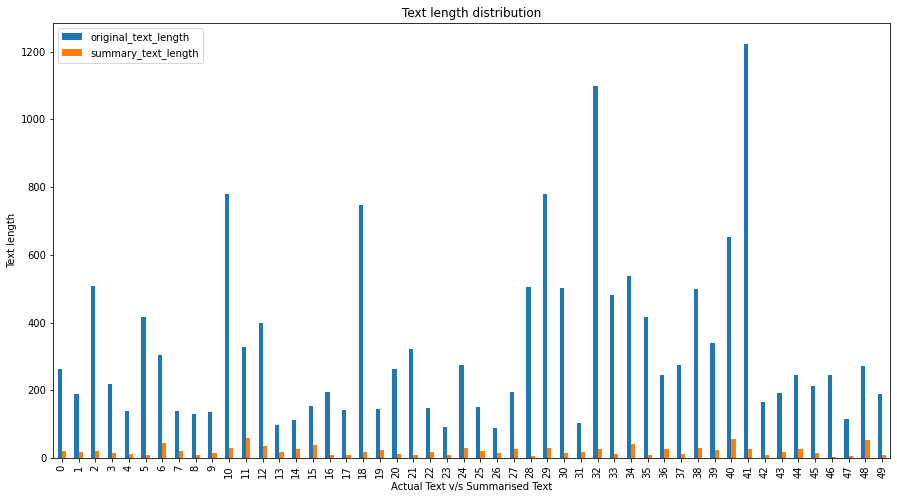

In [ ]:
import matplotlib.pyplot as plt
plot_data = pd.DataFrame(
                          {'original_text_length' : df1['original_text_length'][:50],
                           'summary_text_length' : df1['summary_text_length'][:50]
                          }
                        )
plot_data.plot(kind="bar",figsize=(15, 8))
plt.title("Text length distribution")
plt.xlabel("Actual Text v/s Summarised Text")
plt.ylabel("Text length")

## **Text preprocessing**

We have implemented the following

1.   Remove rows where text or summary = na
2.   Remove duplicated rows of text
3.   Convert text,summary to string type
4.   Convert text,summary to lowercase
5.   Remove puncutations
6.   Remove stopwords

We have done text preprocessing here, because we are creating a custom encoder-decoder model. This model does not contain a pre processing library as opposed to the one in bert model. Thus extractive summarisation did not require any pre-processing.
<br><br>
* First, we drop all the rows where text or summary isn't available or is
actually repeated. This is done to reduce redundant data.
<br>
* Next, we convert all of text and summary to type string (we noticed that some of the data is float value, and encoder-decoder model might not perform well with such outliers.)
<br>
* Lastly, we remove punctuation marks and stopwords, which are not necessary and do not contribute to accurate predictions.

In [ ]:
#we import the nltk corpus for removing stopwords.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# basic pre-processing of text
stop_words = stopwords.words('english')

# remove rows where value of colum = na
df.dropna(axis=0,inplace=True)
df.drop_duplicates(subset=['text'],inplace=True)

# apply basic pre-processing on all columns
for c in df.columns:

  # convert column to string type
  df[c] = df[c].astype(str)
  # convert to lowercase
  df[c] = df[c].str.lower()
  # remove punctuations
  df[c] = df[c].str.replace(r'[^\w\s]+', '')
  # remove stopwords
  df[c] = df[c].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88425 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  88425 non-null  object
 1   text     88425 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


### **Removing very long or very short texts/summaries**

####**Plotting the distribution of number of words in text and summary after text processing**

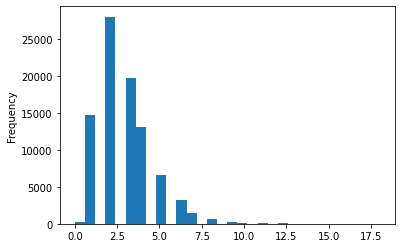

In [ ]:
df['summary'].str.split().str.len().plot.hist(bins=30)

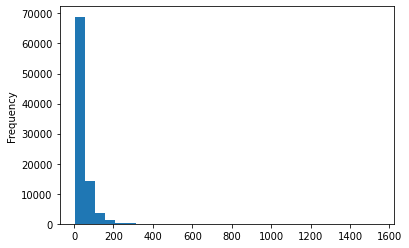

In [ ]:
df['text'].str.split().str.len().plot.hist(bins=30)



From the above plot, we observed that very long texts and summaries are rare, infact summaries are mostly of length <= 10, and we can also restrict the texts to length 50. Becasue of this, we will be removing all the really long summaries i.e. summaries with more than 8 words. Furthermore, we also restrict the text lenght to 30 words.
<br><br>
**Reason to Fix size of texts and summaries**
<br>
We have fixed the number of words because we can send tensors of fixed size to the encoder-decoder model. For this, we will be adding custom start and stop in each sentence, to make them of a fixed size. If we unnceccessarily keep the size of texts and summaries more than 8 and 30 words, we will be feeding the encoder-decoder model a lot of junk data. This data can hamper the performance of our model, and thus the size of text and summaries is fixed.

In [ ]:
# maximum and minimum lengths to which we want to restrict the texts and summaries
max_words_text = 30
min_words_text = 1

max_words_summ = 8
min_words_summ = 1

In [ ]:
# create a mask to discard rows having very long/very short text/summary
mask = []
for i in range(len(df)):
  num_words_text = len(df["text"].iloc[i].split())
  num_words_summ = len(df["summary"].iloc[i].split())

  if num_words_text <= max_words_text and num_words_text>=min_words_text and num_words_summ <= max_words_summ and num_words_summ>=min_words_summ:
    mask.append(True)
  else :
    mask.append(False)

df = df[mask]

##**Word Cloud**
We use the word cloud(i.e.Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.) library to illustrate how dense the paragraph intially was, and how the bert model has summarised it.

####**Displaying word cloud of first text**

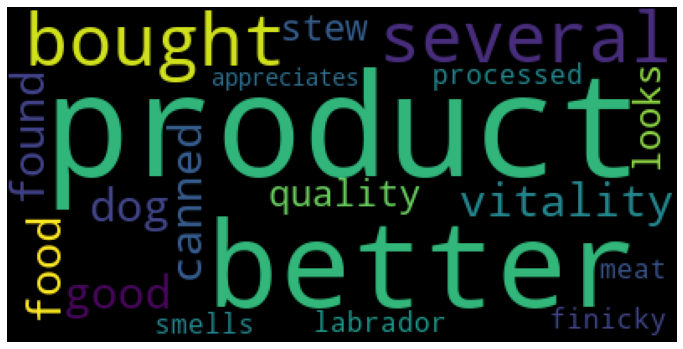

In [ ]:
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'black').generate(df['text'][0])

plt.figure(figsize = (12,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

####**Displaying word cloud of first summary**

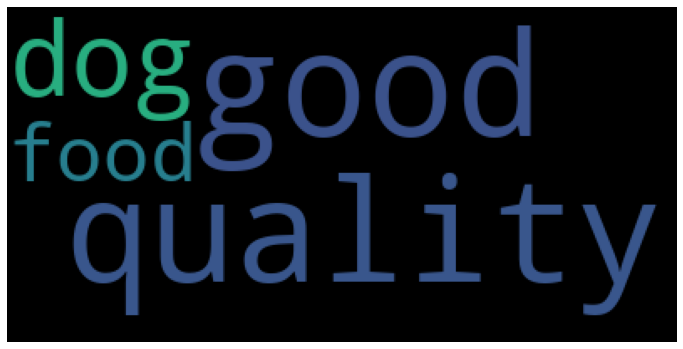

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(df['summary'][0])

plt.figure(figsize = (12,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Append start and end token to summary(needed to start/stop the decoding process in lstm)

In [ ]:
# append start and end tokens
df['summary'] = df['summary'].apply(lambda x : 'starrt '+ x + ' endend')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45703 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  45703 non-null  object
 1   text     45703 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


##**Data Preparation**

### Train,Test split

We are just splitting the train test set to pass to the model.

In [ ]:
from sklearn.model_selection import train_test_split
Xtr,Xte,Ytr,Yte = train_test_split(df['text'],df['summary'],test_size=0.2,random_state=42,shuffle=True)

### Tokenization,padding of data

As mentioned earlier, we need to pass tensors of fixed lenth, so we will be adding start and stop words at the start and end of each tensor.

In [ ]:
import tensorflow as tf

Make 2 different tokenizers for X and Y (i.e text and summary).

We will restrict the vocabluary size to 8000,2000 respectively, as longer vocabulary will increase training time a lot.

Moreover 8000,2000 words are sufficient to capture the essence of text or summary

In [ ]:
Xtokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=12000)
Xtokenizer.fit_on_texts(list(Xtr))

Ytokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=4000)
Ytokenizer.fit_on_texts(list(Ytr))

We will convert the training and testing data to sequences using the tokenizers we created earlier.

```
tokenizer.text_to_sequence
```



also since all the sequences need to be of the same length while training
so we pad all the shorter lists with zeros to get all sequences of same size *= length of the longest sequence*

```
pad_sequences(sequence, maxlen = maxi, padding='post')
```

In [ ]:
x_seq_train = Xtokenizer.texts_to_sequences(Xtr)
x_seq_test = Xtokenizer.texts_to_sequences(Xte)

# find length of the longest sequence
maxi = 0
for x in x_seq_train:
  maxi = max(maxi, len(x))

for x in x_seq_test:
  maxi = max(maxi, len(x))

# pad training and testing data(texts)
Xtr = tf.keras.preprocessing.sequence.pad_sequences(x_seq_train, maxlen = maxi, padding='post')
Xte = tf.keras.preprocessing.sequence.pad_sequences(x_seq_test, maxlen = maxi, padding='post')

same as in last cell this time on Y(summaries)

In [ ]:
y_seq_train = Ytokenizer.texts_to_sequences(Ytr)
y_seq_test = Ytokenizer.texts_to_sequences(Yte)

maxi = 0
for y in y_seq_train:
  maxi = max(maxi, len(y))

for y in y_seq_test:
  maxi = max(maxi, len(y))

# pad training and testing data(texts)
Ytr = tf.keras.preprocessing.sequence.pad_sequences(y_seq_train, maxlen = maxi, padding='post')
Yte = tf.keras.preprocessing.sequence.pad_sequences(y_seq_test, maxlen = maxi, padding='post')

In [ ]:
# for summaries in training and test data remove data points where
# the length of summaries <= 2

# for training part
mask = [(len(y) > 2) for y in y_seq_train]
Xtr = Xtr[mask]
Ytr = Ytr[mask]

# for testing part
mask = [(len(y) > 2) for y in y_seq_test]
Xte = Xte[mask]
Yte = Yte[mask]

In [ ]:
# size of vocabulary = size of embedding layers
voc_x = Xtokenizer.num_words + 1
voc_y = Ytokenizer.num_words + 1

##**Model**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM,Embedding,Input,Dense,TimeDistributed,Concatenate

![](https://miro.medium.com/max/1050/0*g09F8Ua8u2DW4mk7)


###Encoder Model
This encoder model is a custom encoder model for text summarisation.
* Firstly, we need to specify the size and type of input it takes.
* Next, we add an embedding layer : The job of this layer is to covert high dimensional vectors to a lower dimensional space. It makes it easier to do machine learning on text data.
* After we have created an embedding dimension, from which machine learning will be easier to do, we have used 3 stacked LSTM's. We have used LSTM layers as these layers can remember sequences and eliminate unused/useless information, making it a good model for text generation.
  * We have used 300 latents(nodes), and a dropout ratio of 0.4 in each layer.
  * The recurrent dropout(this will mask recurrent networks, i.e. horizontal layers) ratio is kept at 0.4 too.


In [ ]:
#We have used following dimension for lstm

latent_dim = 300
embedding_dim=100


#Input for encoder
in_enc = Input(shape=(Xtr.shape[1],))


#Use of embedding layer
layer1 =  Embedding(voc_x, embedding_dim,trainable=True)


#3 LSTM Layers we are using
layer2 = LSTM(latent_dim,dropout=0.4,return_sequences=True,recurrent_dropout=0.4)
layer3 = LSTM(latent_dim,dropout=0.4,return_sequences=True,recurrent_dropout=0.4)
layer4 = LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)


#Output for decoder
out_enc, h, c = layer4(layer3(layer2(layer1(in_enc))))


#Above output will be served as input for encoder
encoder = Model(inputs=in_enc,outputs=[out_enc, h, c])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Setup Decoder model

This decoder model is a custom decoder model for text summarisation.
* Like encoder, we specify the size, and type of input.
* Next, we add an embedding layer, for decoder model.
* Next, we create LSTM layer. We are creating similar layers in decoder model to map the encoder output back to human readable output.
* We have also used attention layer, to increase accuracy of our model : This layer focuses on essential features and ignores less relevant features. The major problem of encoder-decoder model was that if the encoder gives a wrong summary, the decoder will just translate it, however, with the attention layer, we can ignore non-relevant information and focus on the more relevant ones.
* Finally, we concatenate the attention and output layer. and create a time distributed dense decoder - this layer ensures application of the same dense layer during our LSTM cells unrolling.

In [ ]:
#Input -  Shape and Size
in_dec = Input(shape=(None,))


#For Decoder below is embedding layer
embedding_decoder = Embedding(voc_y, embedding_dim,trainable=True)


#For decoder we will be using below LSTM
lstm_dec = LSTM(latent_dim,return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.2)


#We will be using output layer
out_dec,_,_ = lstm_dec(embedding_decoder(in_dec),initial_state=[h, c])


# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([out_enc,out_dec])


#We are concatenating output and attention layer
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([out_dec, attn_out])

decoder_dense = TimeDistributed(Dense(voc_y, activation='softmax'))
out_dec = decoder_dense(decoder_concat_input)

We use teacher forcing in the training phase i.e after the internal states of decoder is initialised to the final states of encoder. We use the following methodology.

Feed the decoder input data to the decoder word by word to get the predicted word.
Compare this predicted word with the decoder target data to compute the loss function(so in the training phase our objective is to minimize this loss function).


In [ ]:
#Below are state of previous time step

h_input = Input(shape=(latent_dim,))
c_input = Input(shape=(latent_dim,))

decoder_hidden_state_input = Input(shape=(Xtr.shape[1],latent_dim))


#Predicting next word sequence
out_dec_2, h2, c2 = lstm_dec(embedding_decoder(in_dec), initial_state=[h_input, c_input])


#Taking inference from attention layer
attn_out_inf,_ = attn_layer([decoder_hidden_state_input, out_dec_2])
inference = Concatenate(axis=-1, name='concat')([out_dec_2, attn_out_inf])


# Generating probabilty distribution
out_dec_2 = decoder_dense(inference)


# Generated decoder
decoder = Model([in_dec] + [decoder_hidden_state_input,h_input, c_input],[out_dec_2] + [h2, c2])

### **Model visualization**

Define model input/outputs and print summary


In [ ]:
model = Model([in_enc, in_dec], out_dec)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 100)      1200100     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 30, 300)      481200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

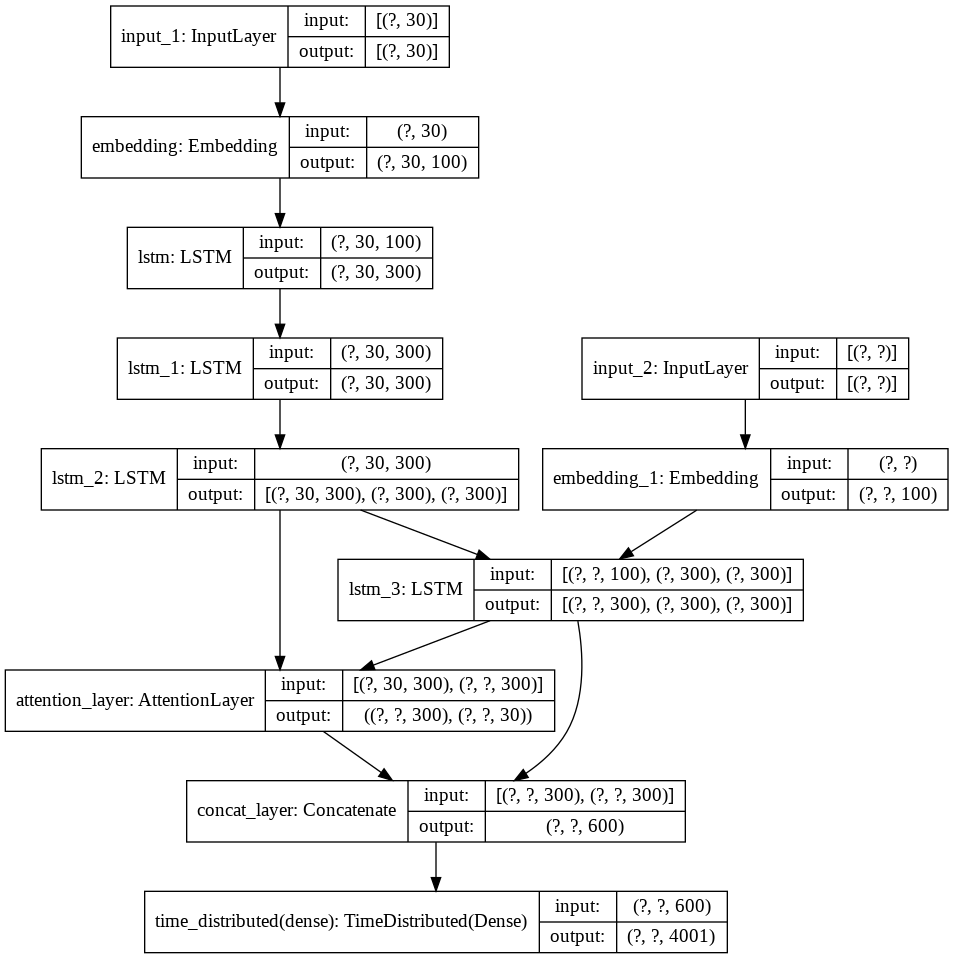

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

### **Model Training**

Compile the model with rmsprop optimizer and loss function sparse_categorical_crossentropy.


In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

Split the testing dataset into validation and test, the validation part is used for the earlystopping condition and to plot the validation accuracy.

In [ ]:
Xte, Xval, Yte, Yval = train_test_split(Xte, Yte, test_size=0.5)

Setup model inputs

In [ ]:
training_input_encoder = [Xtr,Ytr[:,:-1]]
training_input_decoder = Ytr.reshape(Ytr.shape[0],Ytr.shape[1], 1)[:,1:]

validation_input_encoder = [Xval,Yval[:,:-1]]
validation_input_decoder = Yval.reshape(Yval.shape[0],Yval.shape[1], 1)[:,1:]


We are using an early-stopping callback function to stop training the model if the validation loss starts decreasing.


*   maximum number of epochs =  50
*   batch size = 128

In [ ]:
history = model.fit(training_input_encoder, \
                    training_input_decoder, \
                    epochs = 50, \
                    callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)], \
                    batch_size = 128, \
                    validation_data = (validation_input_encoder, validation_input_decoder))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 35807 samples, validate on 4467 samples
Epoch 1/50
35807/35807 [==============================] - 88s 2ms/sample - loss: 2.0471 - val_loss: 1.7912
Epoch 2/50
35807/35807 [==============================] - 76s 2ms/sample - loss: 1.8103 - val_loss: 1.7204
Epoch 3/50
35807/35807 [==============================] - 76s 2ms/sample - loss: 1.7355 - val_loss: 1.6698
Epoch 4/50
35807/35807 [==============================] - 77s 2ms/sample - loss: 1.6879 - val_loss: 1.6473
Epoch 5/50
35807/35807 [==============================] - 76s 2ms/sample - loss: 1.6563 - val_loss: 1.6282
Epoch 6/50
35807/35807 [==============================] - 76s 2ms/sample - loss: 1.6297 - val_loss: 1.6170
Epoch 7/50
35807/35807 [==============================] - 77s 2ms/sample - loss: 1.6031 - val_loss: 1.6032
Epoch 8/50
35807/35807 [==============================] - 77s 2ms/sample - loss: 1.5793 - val_loss: 1.5883
E

Plot the loss function as a function of epochs

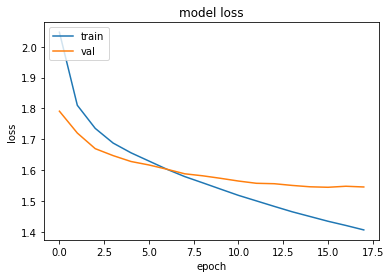

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Summary generation**

For prediciting summary, we feed input sequence into predict_summ function , so the first start word in target sequence is start token which is used for initialising the model. Then we calculate final state of encoder which will be passed to decoder.

After that we calculate probability of occurence of each token and select word with maximum probability but as soon as end token is encountered or length of current summary reached is maximum limit set then we break the loop.

In [ ]:

def predict_summ(input_seq):

    #Applying start token
    target_seq = np.array([[Ytokenizer.word_index['starrt']]])

    result = ''
    words_decoded = 0


    #Generated encoder is passed to decoder
    state_enc = encoder.predict(input_seq)

    while True:

       #Finding probabilty for each word
        tokens_output, h, c = decoder.predict([target_seq] + state_enc)


        #Selecting maximum probabilty word
        idx = np.argmax(tokens_output[0, -1, :])
        token = Ytokenizer.index_word[idx]


        #Breaking loop if end token is encountered
        if(token == 'endend'):
          break


        #Adding selected word to result
        result += f" {token}"


        #Increasing decoded count
        words_decoded += 1


        #If maximum limit of decoded word is reached break the loop
        if (words_decoded >= (Ytr.shape[1]-1)):
          break


        target_seq = np.array([[idx]])

        # Updating new states
        state_enc[1] = h
        state_enc[2] = c

    return result


We calculate reviews for top 50 text, by predicting summary of each text.

In [ ]:
Xdata = Xtr[:50,:]
Ydata = Ytr[:50,:]

#Preparing text for which summary needs to be generated
reviews = Xtokenizer.sequences_to_texts(Xdata)


# original summary
original_summaries = Ytokenizer.sequences_to_texts(Ydata)
original_summaries = [s[7:][:-7] for s in original_summaries]


# predicted_summary
predicted_summaries = [predict_summ(np.atleast_2d(x)) for x in Xdata]

for i in range(len(predicted_summaries)):
  print(f" Review : {reviews[i]}")
  print(f" Original summary: {original_summaries[i]}")
  print(f" Predicted summary: {predicted_summaries[i].lstrip()}")
  print("-"*50)

 Review : best chips ever hate chips ruined mass quantities salt chips actually taste thing wrong good cant stop eating light crisp greasy tasty could get better
 Original summary: best
 Predicted summary: great chips
--------------------------------------------------
 Review : made green tea ice cream using recipe ice cream maker minus sugar called forbr br
 Original summary: made ice cream
 Predicted summary: great tea
--------------------------------------------------
 Review : perfect product application needed need make white chocolate candy melts taste like cream cheese frosting trick excited use recipes
 Original summary: taste amazing fun
 Predicted summary: great product
--------------------------------------------------
 Review : never fond breakfast bars general apple bars make great snack sweet mushy chewy bars right
 Original summary: good grab go snack
 Predicted summary: great snack
--------------------------------------------------
 Review : felt like little sweet didnt

####**Comparison of original text length and predicted summary length**

Text(0, 0.5, 'Text length')

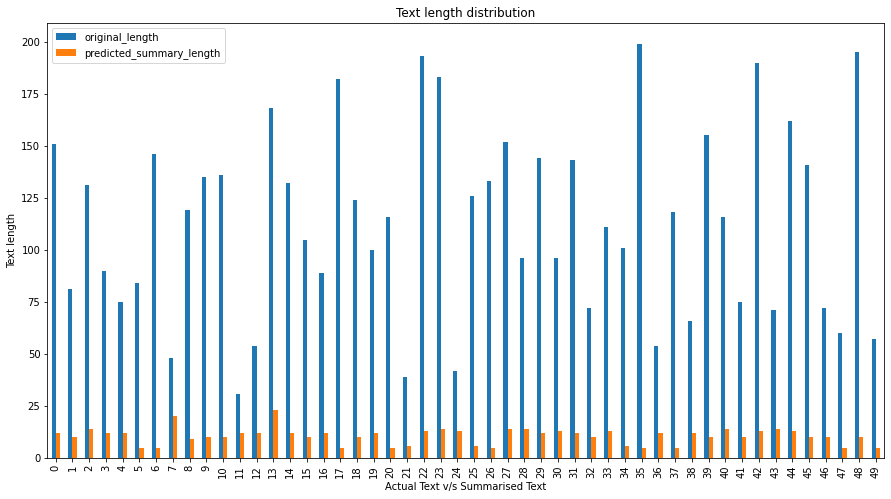

In [ ]:
plot_data = pd.DataFrame({'original_length' : [len(s) for s in reviews],
                          'predicted_summary_length' : [len(s) for s in predicted_summaries]
                          }
                        )
plot_data.plot(kind="bar",figsize=(15, 8))
plt.title("Text length distribution")
plt.xlabel("Actual Text v/s Summarised Text")
plt.ylabel("Text length")

####**Comparison of Actual summary length v/s predicted summary length**

Text(0, 0.5, 'Text length')

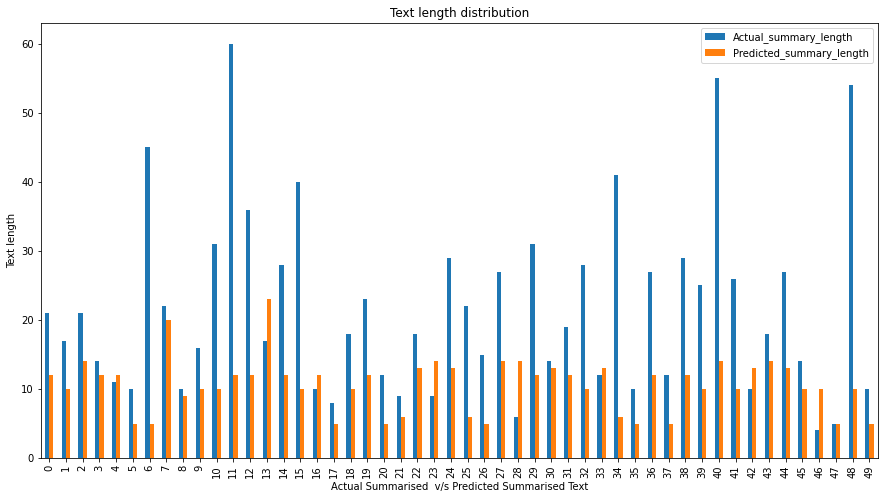

In [ ]:
plot_data = pd.DataFrame(
                          {'Actual_summary_length' : df1['summary_text_length'][:50],
                           'Predicted_summary_length' : [len(s) for s in predicted_summaries][:50]
                          }
                        )
plot_data.plot(kind="bar",figsize=(15, 8))
plt.title("Text length distribution")
plt.xlabel("Actual Summarised  v/s Predicted Summarised Text")
plt.ylabel("Text length")

####**Comparing Word Cloud of Original Text V/S Predicted Summarised Text**

Sentence Number -  1


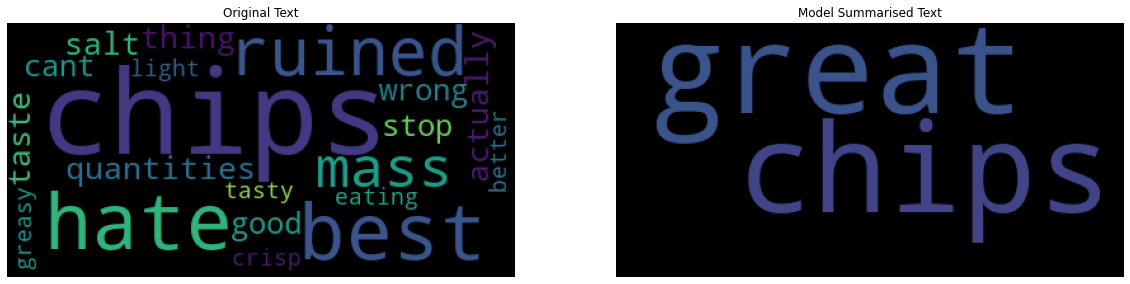




Sentence Number -  2


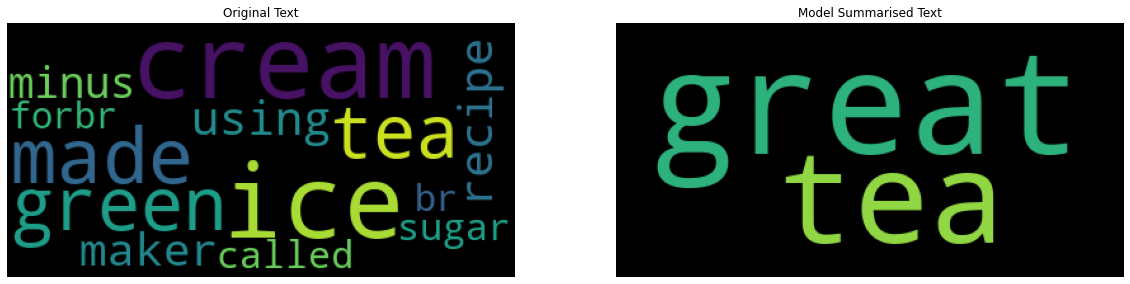




Sentence Number -  3


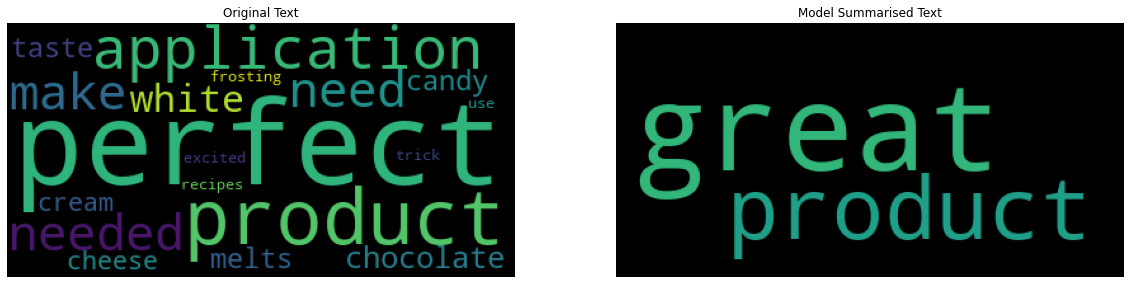

In [ ]:
for idx in range(3):

  word_cloud1 = WordCloud(collocations = False, background_color = 'black').generate(reviews[idx])
  word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(predicted_summaries[idx])

  print('Sentence Number - ',idx+1)

  fig, ax = plt.subplots(1,2,figsize=(20, 20))

  ax[0].imshow(word_cloud1)
  ax[0].axis('off')
  ax[0].set_title('Original Text')

  ax[1].imshow(word_cloud2)
  ax[1].axis('off')
  ax[1].set_title('Model Summarised Text')
  plt.show()

  print('\n\n')